### Goal: Explore the dataset and to identify features behind articles that have the highest shares.

#### To Do:
* Split Dataset by data_channel / day_of_release
* Apply LDA for each to undestand what they talked about
* Sentiment Analysis of top shares vs lower shares


# Mashable Project 

URL : https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity

### Attribute Information: 
0. url: URL of the article (non-predictive) 
1. timedelta: Days between the article publication and the dataset acquisition (non-predictive) 
2. n_tokens_title: Number of words in the title 
3. n_tokens_content: Number of words in the content 
4. n_unique_tokens: Rate of unique words in the content 
5. n_non_stop_words: Rate of non-stop words in the content 
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content 
7. num_hrefs: Number of links 
8. num_self_hrefs: Number of links to other articles published by Mashable 
9. num_imgs: Number of images 
10. num_videos: Number of videos 
11. average_token_length: Average length of the words in the content 
12. num_keywords: Number of keywords in the metadata 
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'? 
14. data_channel_is_entertainment: Is data channel 'Entertainment'? 
15. data_channel_is_bus: Is data channel 'Business'? 
16. data_channel_is_socmed: Is data channel 'Social Media'? 
17. data_channel_is_tech: Is data channel 'Tech'? 
18. data_channel_is_world: Is data channel 'World'? 
19. kw_min_min: Worst keyword (min. shares) 
20. kw_max_min: Worst keyword (max. shares) 
21. kw_avg_min: Worst keyword (avg. shares) 
22. kw_min_max: Best keyword (min. shares) 
23. kw_max_max: Best keyword (max. shares) 
24. kw_avg_max: Best keyword (avg. shares) 
25. kw_min_avg: Avg. keyword (min. shares) 
26. kw_max_avg: Avg. keyword (max. shares) 
27. kw_avg_avg: Avg. keyword (avg. shares) 
28. self_reference_min_shares: Min. shares of referenced articles in Mashable 
29. self_reference_max_shares: Max. shares of referenced articles in Mashable 
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable 
31. weekday_is_monday: Was the article published on a Monday? 
32. weekday_is_tuesday: Was the article published on a Tuesday? 
33. weekday_is_wednesday: Was the article published on a Wednesday? 
34. weekday_is_thursday: Was the article published on a Thursday? 
35. weekday_is_friday: Was the article published on a Friday? 
36. weekday_is_saturday: Was the article published on a Saturday? 
37. weekday_is_sunday: Was the article published on a Sunday? 
38. is_weekend: Was the article published on the weekend? 
39. LDA_00: Closeness to LDA topic 0 
40. LDA_01: Closeness to LDA topic 1 
41. LDA_02: Closeness to LDA topic 2 
42. LDA_03: Closeness to LDA topic 3 
43. LDA_04: Closeness to LDA topic 4 
44. global_subjectivity: Text subjectivity 
45. global_sentiment_polarity: Text sentiment polarity 
46. global_rate_positive_words: Rate of positive words in the content 
47. global_rate_negative_words: Rate of negative words in the content 
48. rate_positive_words: Rate of positive words among non-neutral tokens 
49. rate_negative_words: Rate of negative words among non-neutral tokens 
50. avg_positive_polarity: Avg. polarity of positive words 
51. min_positive_polarity: Min. polarity of positive words 
52. max_positive_polarity: Max. polarity of positive words 
53. avg_negative_polarity: Avg. polarity of negative words 
54. min_negative_polarity: Min. polarity of negative words 
55. max_negative_polarity: Max. polarity of negative words 
56. title_subjectivity: Title subjectivity 
57. title_sentiment_polarity: Title polarity 
58. abs_title_subjectivity: Absolute subjectivity level 
59. abs_title_sentiment_polarity: Absolute polarity level 
60. shares: Number of shares (target)

###### Citation Request Below: 

 Please include this citation if you plan to use this database: 
 
    K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision
    Support System for Predicting the Popularity of Online News. Proceedings
    of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence,
    September, Coimbra, Portugal.
    
a link that could be of interest; http://www-scf.usc.edu/~jiayingg/0%20Characterize%20Data-results.html



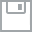
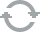
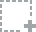
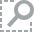
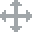
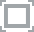
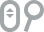
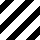
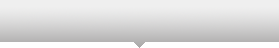
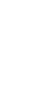
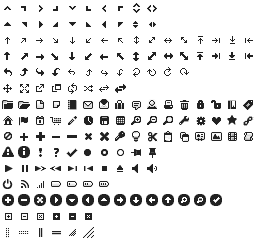
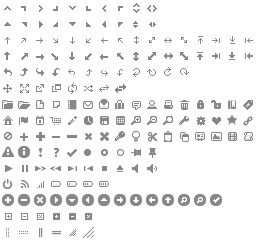
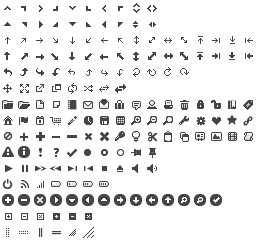
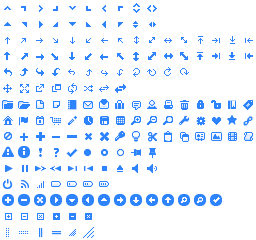
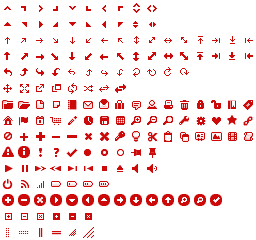
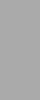
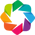
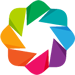

In [1]:
import numpy as np
import pandas as pd
import math

# allow plots to appear in the noteboo

# create a custom colormap
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from bokeh.plotting import figure,show,output_notebook
from bokeh.models import Range1d
from bokeh.io import hplot, output_file

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split

from sklearn.decomposition import PCA #SVD

output_notebook()
%matplotlib inline

In [2]:

mash = pd.read_csv("OnlineNewsPopularity.csv") #remember that read_csv auto places read data into a DF

#noticed that the headers all had a whitespace in it, so needed to remove it.
mash.columns = mash.columns.str.strip()

mash['url_id'] = mash.index

#let's move the url_id column from the end to the top.

cols = mash.columns.tolist()
cols

cols = cols[-1:] + cols[:-1]
cols

mash = mash[cols]

## Exp 1

Let's cut the data down to only a couple of columns, and analyze based off of the URL

* n_tokens_title : 
* n_tokens_content :  
* n_unique_tokens : 
* num_hrefs

In [3]:
exp1_col = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs']
            #removed url_id

mash_1 = mash[exp1_col]

In [4]:
data_channel = []

#1 : lifestyle
#2 : entertainment
#3 : business
#4 : social media
#5 : tech
#6 : world
#0 : none of the above

#each article has multiple values

for value in range(len(mash)):
    
    if(mash.data_channel_is_lifestyle[value] == 1):
        data_channel.append(1)
    
    elif(mash.data_channel_is_entertainment[value] == 1 ):
        data_channel.append(2)
        
    elif(mash.data_channel_is_bus[value] == 1):
        data_channel.append(3)
        
    elif(mash.data_channel_is_socmed[value] == 1):
        data_channel.append(4)
        
    elif(mash.data_channel_is_tech[value] == 1):
        data_channel.append(5)
        
    elif(mash.data_channel_is_world[value] == 1):
        data_channel.append(6)
        
    else:
        data_channel.append(0)

len(data_channel)

39644

In [5]:
#CAN IGNORE. BELOW CODE was used to test to see if there any other variations of 0, 1 in the 'data_channels'

test = pd.DataFrame(mash['data_channel_is_world'])
x = (test==1).sum() #2099 numbers of 1
y = (test==0).sum() #37545

print x
print y
print (x + y)

data_channel_is_world    8427
dtype: int64
data_channel_is_world    31217
dtype: int64
data_channel_is_world    39644
dtype: int64


In [6]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(mash_1, data_channel) 

score_knn = cross_validation.cross_val_score(knn, mash_1, data_channel)
score_knn.mean()

#score of 0.027

0.26980260153124963

With only 4 labels, KNN should be a very bad model for this case.

In [7]:
#Now let's do a logistic regression based off of these 3 features to see if they even have any significance

model_LR = LogisticRegression

/Users/brianzhou/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


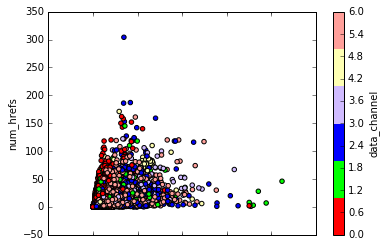

In [8]:
#graphing num_hrefs vs n_tokens_title

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#D0BBFF', '#feffb3', '#FF9F9A'])

mash_1['data_channel'] = data_channel

mash_1.plot(kind='scatter', x='n_tokens_content', y='num_hrefs', c='data_channel', colormap = cmap_bold)
#mash_1.plot()
#['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs']

#.plot is part of dataframe

In [9]:
#In case we need to reapply our data

mash = pd.read_csv("OnlineNewsPopularity.csv") #remember that read_csv auto places read data into a DF

#noticed that the headers all had a whitespace in it, so needed to remove it.
mash.columns = mash.columns.str.strip()

mash['url_id'] = mash.index

#let's move the url_id column from the end to the top.

cols = mash.columns.tolist()
cols

cols = cols[-1:] + cols[:-1]
cols

mash = mash[cols]


# Remove features that we don't understand.

1. kw_min_min: Worst keyword (min. shares)
2. kw_max_min: Worst keyword (max. shares)
3. kw_avg_min: Worst keyword (avg. shares)
4. kw_min_max: Best keyword (min. shares)
5. kw_max_max: Best keyword (max. shares)
6. kw_avg_max: Best keyword (avg. shares)
7. kw_min_avg: Avg. keyword (min. shares)
8. kw_max_avg: Avg. keyword (max. shares)
9. kw_avg_avg: Avg. keyword (avg. shares)
10. self_reference_min_shares: Min. shares of referenced articles in Mashable
11. self_reference_max_shares: Max. shares of referenced articles in Mashable
12. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable
13. LDA_00: Closeness to LDA topic 0
14. LDA_01: Closeness to LDA topic 1
15. LDA_02: Closeness to LDA topic 2
16. LDA_03: Closeness to LDA topic 3
17. LDA_04: Closeness to LDA topic 4

In [10]:
exc_list_labels = ['timedelta','kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 
                   'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
                  'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']

for value in exc_list_labels:
    mash = mash.drop([value], axis = 1)


# Experiment 2 + 3

Remove all of the binary classification labels, and then use logistic regression to identify what features are most important for which days of the week as well as what type of data channels

In [11]:
columns_remove_channels = ['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 
                  'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world']

columns_remove_days = ['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 
                 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend']

#interesting to note about the 'is_weekend' column

In [12]:
#Build a DataFrame (mash_2 that will )

count = 1

#Definition of Mash_2

for value in columns_remove_days:
    if(count == 1):
        mash_2 = mash.drop([value], axis = 1)
        mash_2 = mash_2.drop(['url'], axis = 1)
        mash_2 = mash_2.drop(['url_id'], axis = 1)
        
        count = 2
    else:
        mash_2 = mash_2.drop([value], axis = 1)

for value in columns_remove_channels:
    mash_2 = mash_2.drop([value], axis = 1)
    

mash_2['type_data_channel'] = data_channel #categorized what type of article it is

exp2_cross_results = []

In [13]:
plots = []

count = 1
coeffs_list = []

for value2 in columns_remove_days:

#THIS WHOLE MODULE IS FOCUSING ON A LGR DONE ONTO THE DAY OF RELEASE

    target_2 = mash[value2] #Let's see what features are selective for releasing on Monday.

    std_scalar = StandardScaler()
    features_2 = std_scalar.fit_transform(mash_2)

##

    X_train, X_test, y_train, y_test = train_test_split(features_2, target_2, test_size=0.2, random_state=1)

    model_lgr = LogisticRegression()
    model_lgr.fit(X_train,y_train)
    
##

    col_1_name = 'features for %s' % value2

    coefficient_lgr = model_lgr.coef_.ravel() #coefficients
    coeffs = pd.DataFrame(zip(mash_2.columns,model_lgr.coef_.ravel()), columns = [col_1_name, 'coeff'])    

    coeffs['abs']=np.absolute(coeffs.coeff.values) #putting all values to be positive
    coeffs_sort = coeffs.sort('abs', ascending = False) #absolute values of the importance
    coeffs_list.append(coeffs_sort)
    
#Below is code related to graphing and plotting. 
    
    x = np.arange(len(mash_2.columns))

    feature_names = mash_2.columns
    
    title_name = "Model Coefficients for %s" % value2

    p = figure(title= title_name, tools = '', width = 250, height = 250)
    p.logo = None
    p.toolbar_location = None

    for val in x:
        p.quad(top = coefficient_lgr[val], bottom=0, left=val+0.2,
               right=val+0.8,legend=None)
    
    p.y_range = Range1d(min(coefficient_lgr)-0.1, max(coefficient_lgr)+1.5)

    plots.append(p)


/Users/brianzhou/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:30: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [14]:
mash_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39644 entries, 0 to 39643
Data columns (total 29 columns):
n_tokens_title                  39644 non-null float64
n_tokens_content                39644 non-null float64
n_unique_tokens                 39644 non-null float64
n_non_stop_words                39644 non-null float64
n_non_stop_unique_tokens        39644 non-null float64
num_hrefs                       39644 non-null float64
num_self_hrefs                  39644 non-null float64
num_imgs                        39644 non-null float64
num_videos                      39644 non-null float64
average_token_length            39644 non-null float64
num_keywords                    39644 non-null float64
global_subjectivity             39644 non-null float64
global_sentiment_polarity       39644 non-null float64
global_rate_positive_words      39644 non-null float64
global_rate_negative_words      39644 non-null float64
rate_positive_words             39644 non-null float64
rate_negati

# Not sure if we can do this, since we are using same data, but changing class

With Logistic Regression:

### Important Features that show an article is likely Published on:

    Monday: 
        * rate_positive_words: 0.168
        * n_non_stop_unique_tokens: -0.136
        * n_unique_tokens: 0.126
        
    Tuesday:
        * n_non_stop_words: 0.279
        * n_non_stop_unique_tokens: -0.250
        * n_unique_tokens: 0.245
        
    Wednesday:
        * n_unique_tokens: -0.577
        * n_non_stop_words: -0.128
        * num_hrefs: -0.078
        
    Thursday:
        * n_unique_tokens: -0.174
        * n_non_stop_unique_tokens -0.144
        * n_non_stop_words: -0.997
        
    Friday:
        * n_non_stop_words: -0.924
        * n_non_stop_unique_tokens: 0.839
        * n_unique_tokens: 0.070
        
    Saturday:
        * n_unique_tokens: -1.10
        * n_non_stop_unique_tokens -0.692
        * rate_positive_words: -0.201
        
    Sunday:
        * rate_positive_words: -0.621
        * n_unique_tokens: 0.431
        * average_token_length: 0.376
        
    IS_Weekend:
        * n_non_stop_unique_tokens: -0.302
        * rate_positive_words: -0.474
        * n_unique_tokens: -0.302

In [15]:
for value in plots:
    show(value)

In [16]:
#EXACT COPY OF MASH_2 ANALYSIS, BUT NOW FOR THE TYPE OF ARTICLES

plots = []

count = 1
coeffs_list = []

mash_2 = mash_2.drop(['type_data_channel'], axis = 1) #remove

for value3 in columns_remove_channels:

    target_3 = mash[value3] #Let's see what features are selective for releasing on Monday.

    std_scalar = StandardScaler()
    features_2 = std_scalar.fit_transform(mash_2) #still features_2/mash_2 as the dataframe shouldn't change

##

    X_train, X_test, y_train, y_test = train_test_split(features_2, target_3, test_size=0.2, random_state=1)

    model_lgr = LogisticRegression()
    model_lgr.fit(X_train,y_train)
    
    
##

    col_1_name = 'features for %s' % value3

    coefficient_lgr = model_lgr.coef_.ravel() #coefficients
    coeffs = pd.DataFrame(zip(mash_2.columns,model_lgr.coef_.ravel()), columns = [col_1_name, 'coeff'])
    coeffs.head()

    coeffs['abs']=np.absolute(coeffs.coeff.values) #putting all values to be positive
    coeffs_sort = coeffs.sort('abs', ascending = False).head(10) #changed to top 10 due to larger correlation
    coeffs_list.append(coeffs_sort)
    
    #Below is code related to graphing and plotting. 
    
    x = np.arange(len(mash_2.columns))

    feature_names = mash_2.columns
    
    title_name = "Model Coefficients for %s" % value3

    #p = figure(title= title_name, tools = '', width = 250, height = 250)
    p = figure(title= title_name, tools = '')
    p.logo = None
    p.toolbar_location = None

    for val in x:
        p.quad(top = coefficient_lgr[val], bottom=0, left=val+0.2,
               right=val+0.8)
    
    p.y_range = Range1d(min(coefficient_lgr)-0.1, max(coefficient_lgr)+1.5)

    plots.append(p)


/Users/brianzhou/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:34: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [17]:
for value in plots:
    show(value)

In [18]:
coeffs_list[5]

#iterated over to build the markdown below detailing the labels with the highest importance

features for data_channel_is_world     coeff       abs
2                     n_unique_tokens -8.622123  8.622123
4            n_non_stop_unique_tokens  3.502341  3.502341
9                average_token_length  1.919547  1.919547
15                rate_positive_words -1.237235  1.237235
16                rate_negative_words -0.835911  0.835911
3                    n_non_stop_words -0.819600  0.819600
13         global_rate_positive_words -0.624756  0.624756
7                            num_imgs -0.496472  0.496472
21              min_negative_polarity -0.465110  0.465110
6                      num_self_hrefs -0.452178  0.452178

With Logistic Regression:

### Important Features that show an article is likely what data channel:

n_unique_tokens is classified as being important in 5/6. 
n_non_stop_unique_tokens is classified as being important in 5/6.


    Lifestyle: 
        * n_unique_tokens: -2.219
        * n_non_stop_unique_tokens 2.208
        * average_token_length: -0.766
        
    Entertainment: 
        * n_unique_tokens: 6.727
        * average_token_length: -0.910
        * rate_positive_words: 0.715
        
    Bus:
        * n_unique_tokens: -3.795
        * n_non_stop_unique_tokens: 1.278
        * num_imgs: -0.995
        
    Socmed:
        * n_non_stop_unique_tokens: -1.581
        * rate_positive_words: 0.801
        * n_unique_tokens: -0.669
        
    Tech:
        * n_unique_tokens: -5.878
        * n_non_stop_unique_tokens: -2.509
        * rate_positive_words: 2.222
        
    World:
        * n_unique_tokens: -8.665
        * n_non_stop_unique_tokens: 3.533
        * average_token_length: 1.920
        

## Apply a PCA for Dimensionality Reduction of the 'mash_2' labels
* PCA

In [19]:
#PCA
pca = PCA(n_components = 2)

mash_4 = mash.drop(['url', 'shares'], axis = 1)
mash_pca = pca.fit(mash_4).transform(mash_4) #data is fit

#mash_pca = pca.fit(mash_2).transform(mash_2)

In [20]:
mash_4.shape
mash_pca.shape 

(39644, 2)

In [21]:
#Below shows how much variance occurs for the first two principal components


# Percentage of variance explained (first two components):
print "First component: " + str(pca.explained_variance_ratio_[0]) #explained_variance_ratio
print "Second component: " + str(pca.explained_variance_ratio_[1]) #explained_variance_ratio 

print "Total Sum of Variance Ratios: " + str(pca.explained_variance_ratio_.sum())
#explained_variance_ratio means: amount of variance at each component explained


First component: 0.998312157997
Second component: 0.00168588018815
Total Sum of Variance Ratios: 0.999998038186


In [22]:
p = figure(title="PCA in Mash_2 Dataset",tools='')

x_values =  mash_pca[:,0]
y_values =  mash_pca[:,1]
p.circle(x = x_values,y=y_values,size = 5)

show(p)

In [23]:
x_2 = range(len(mash_4))
y_2 = pca.explained_variance_ratio_

p = figure(title = 'Scree Plot', tools ='')
p.line(x_2, y_2)
show(p)

ERROR:/Users/brianzhou/anaconda/lib/python2.7/site-packages/bokeh/validation/check.pyc:E-1000 (COLUMN_LENGTHS): ColumnDataSource column lengths are not all the same: ColumnDataSource, ViewModel:ColumnDataSource, ref _id: b2cd453c-807d-40c8-9869-327dadfcabcb


In [24]:
mash.num_videos.value_counts()

#test = 5275 + 1596 + 328 + 49 + 19 + 15 + 13 + 10 + 10 + 10 + 8 + 5 + 2 + 1 

0     25026
1      9483
2      2189
3       527
11      285
4       245
10      213
21      202
5       149
26      124
6       116
16      103
9       101
7        90
8        82
15       81
12       79
13       73
14       69
25       68
20       59
17       54
18       29
27       28
22       25
19       16
31       15
33       15
24       12
23       11
28        9
73        7
50        7
51        6
34        5
74        5
30        4
32        4
29        3
35        3
58        3
36        2
75        2
38        2
42        2
48        2
59        2
65        2
66        1
49        1
46        1
53        1
91        1
Name: num_videos, dtype: int64

In [25]:
mash_2['tech'] = mash.data_channel_is_tech

#the dataset is now only technology girls. 
mash_2 = mash_2[mash_2.tech == 1]

mash_2

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
4                  13              1072         0.415646                 1   
5                  10               370         0.559889                 1   
7                  12               989         0.433574                 1   
8                  11                97         0.670103                 1   
19                  8              1207         0.410579                 1   
20                 13              1248         0.390638                 1   
22                 11              1154         0.427305                 1   
25                  8               266         0.572581                 1   
26                  8               331         0.562691                 1   
27                 12              1225         0.385452                 1   
31                 10               633         0.476038                 1   
32                 14               290         0.611511                 1   
36                 10              1244         0.417547                 1   
40                 10              1036         0.429550                 1   
41                  6               174         0.691860                 1   
42                 14              1237         0.423770                 1   
43                 10              1081         0.428037                 1   
44                  9              1022         0.427427                 1   
48                 11              1108         0.408592                 1   
49                 11              1089         0.418692                 1   
50                 11               214         0.644550                 1   
51                  9               944         0.433012                 1   
52                  9              1030         0.422244                 1   
54                  9              1115         0.424132                 1   
55                 10               555         0.535390                 1   
57                  8               130         0.821705                 1   
59                  9               280         0.576642                 1   
60                 13              1024         0.428008                 1   
61                 12               238         0.621277                 1   
62                  9              1070         0.421550                 1   
...               ...               ...              ...               ...   
39408              10               471         0.538803                 1   
39413              14               258         0.430380                 1   
39423              13              1439         0.384673                 1   
39430              10               392         0.509333                 1   
39448              11               872         0.427562                 1   
39453              13               605         0.462712                 1   
39460              17               262         0.605578                 1   
39465              14               428         0.550481                 1   
39471              13              1300         0.411810                 1   
39483              16               238         0.589744                 1   
39487              11               303         0.601351                 1   
39494               8               301         0.572881                 1   
39507              10               321         0.598071                 1   
39514              13               813         0.415906                 1   
39520              10               572         0.521739                 1   
39532              13               961         0.499468                 1   
39535               9               346         0.589595                 1   
39542              14               485         0.509595                 1   
39548              12               353         0.587537                 1   
39560               9        

In [29]:
mash.tech.info()

AttributeError: 'DataFrame' object has no attribute 'tech'